# Time-resolved frequency analysis of EEG traces

This project delves into the intriguing intersection of sentence ambiguity and syntactic processing. It is focused on a partial analysis of the RITA dataset, published by Roncaglia-Denissen et al in 2015, that comprises EEG traces from Turkish individuals in the early stages of learning German. The dataset was compiled during an experimental procedure that involved participants listening to spoken German sentences while simultaneously viewing visual input.

Equipped with an electrode cap featuring 65 electrodes, set up in the 10-20 system, the participants' EEG activity was recorded at a sampling rate of 500 Hz. This examination involved two separate conditions. The experimental condition had the participants deal with ambiguous German sentences that posed syntactic challenges. Conversely, the baseline condition involved non-ambiguous, easily interpretable German sentences.

The primary objective of this project is to scrutinize the spectral properties of the EEG during both the experimental and control conditions, with a specific interest in the low gamma band activity ranging from 30-60 Hz. In total, the EEG trace of fourteen participants are part of this analysis, spanning 44 trials and 59 channels. There are 276 time points for the baseline condition and 751 for the experimental condition. The particular focus of this analysis is on the brain activity surrounding the crucial item's onset, the auxiliary verb, which would clarify the sentence's meaning.

The project unfolds in two key sections. The first involves an exploratory data analysis, enabling us to get a firm grasp of the available data. Subsequently, I built time-frequency representations (TFRs) for both conditions, paving the way for an in-depth, time-resolved time-frequency analysis.

This study can be viewed as a within-subject comparison, where we juxtaposed neural data from the same participant under different trial conditions. The goal was to identify the spectral features that were more prevalent in one condition over the other.

At the next level, the analysis expanded to group statistics. I attempted to answer questions such as, "Do early language learners, as a group, exhibit greater spectral power in the low gamma band (30-60 Hz) when processing ambiguous sentences as opposed to non-ambiguous ones?"

The analytical process was initiated by establishing data structures (refer to Worksheet 0) capable of storing pertinent data. Since EEG activity can vary significantly among individuals due to factors like skull thickness and skin conductivity, I focused on relative differences within each participant to offset uncontrolled between-subject effects.

Two principal data files were involved in the analysis: the "Control" file containing the non-ambiguous conditions and the "Experimental" file containing the ambiguous conditions. These files, structured as 3D NumPy arrays, follow a specific layout:

- The 0 dimension represents the trial repetitions
- The 1st dimension pertains to the number of channels
- The 2nd dimension associates with the number of samples in a trial, with 276 samples for the baseline condition and 751 samples for the evoked period.

## Motivation
In this notebook, I performed a time-resolved frequency analysis of several EEG traces. The goal is to identify uniform shifts in EEG power across certain frequency bands in response to the initiation of a crucial item in the sentences, essentially creating a neural fingerprint for this occurrence. This type of data could potentially serve as a training input for machine learning or deep learning models that are aimed at task conditions. Progress in this area might become useful in fields such as language acquisition monitoring, brain-computer interfaces, or human-robot interactions.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})  
import os
from pprint import pprint
import pandas as pd 
import numpy as np
import scipy.fft as fft

## Data loading

This project delves into the intriguing intersection of sentence ambiguity and syntactic processing. It is focused on a deep analysis of the RITA dataset, published by Roncaglia-Denissen et al in 2015, that comprises EEG traces from Turkish individuals in the early stages of learning German. The dataset was compiled during an experimental procedure that involved participants listening to spoken German sentences while simultaneously viewing visual input.

Equipped with an electrode cap featuring 65 electrodes, set up in the 10-20 system, the participants' EEG activity was recorded at a sampling rate of 500 Hz. This examination involved two separate conditions. The experimental condition had the participants deal with ambiguous German sentences that posed syntactic challenges. Conversely, the baseline condition involved non-ambiguous, easily interpretable German sentences.

The primary objective of this project is to scrutinize the spectral properties of the EEG during both the experimental and control conditions, with a specific interest in the low gamma band activity ranging from 30-60 Hz. In total, the EEG trace of fourteen participants are part of this analysis, spanning 44 trials and 59 channels. There are 276 time points for the baseline condition and 751 for the experimental condition. The particular focus of this analysis is on the brain activity surrounding the crucial item's onset, the auxiliary verb, which would clarify the sentence's meaning.

The project unfolds in two key sections. The first involves an exploratory data analysis, enabling us to get a firm grasp of the available data. Subsequently, I built time-frequency representations (TFRs) for both conditions, paving the way for an in-depth, time-resolved time-frequency analysis.

This study can be viewed as a within-subject comparison, where we juxtaposed neural data from the same participant under different trial conditions. The goal was to identify the spectral features that were more prevalent in one condition over the other.

At the next level, the analysis expanded to group statistics. I attempted to answer questions such as, "Do early language learners, as a group, exhibit greater spectral power in the low gamma band (30-60 Hz) when processing ambiguous sentences as opposed to non-ambiguous ones?"

The analytical process was initiated by establishing data structures (refer to Worksheet 0) capable of storing pertinent data. Since EEG activity can vary significantly among individuals due to factors like skull thickness and skin conductivity, I focused on relative differences within each participant to offset uncontrolled between-subject effects.

Two principal data files were involved in the analysis: the "Control" file containing the non-ambiguous conditions and the "Experimental" file containing the ambiguous conditions. These files, structured as 3D NumPy arrays, follow a specific layout:

- The 0 dimension represents the trial repetitions
- The 1st dimension pertains to the number of channels
- The 2nd dimension associates with the number of samples in a trial, with 276 samples for the baseline condition and 751 samples for the evoked period.

## Loading data

In [2]:
# Define the directory path where the files are located
path_data = '/Users/paula/Desktop/Cognitive Neuroscience Project/data'

# Initialize empty lists to store different types of files
control_files = list()
experimental_files = list()
control_files_baseline = list()
experimental_files_baseline = list()

# Iterate through all the files in the specified directory
for f in os.listdir(path_data):
    # Check if the file ends with "control.npy"
    if f.endswith("control.npy"):
        control_files.append(f)
    # Check if the file ends with "experimental.npy"
    elif f.endswith("experimental.npy"):
        experimental_files.append(f)
    # Check if the file ends with "control_baseline.npy"
    elif f.endswith("control_baseline.npy"):
        control_files_baseline.append(f)
    # Check if the file ends with "experimental_baseline.npy"
    elif f.endswith("experimental_baseline.npy"):
        experimental_files_baseline.append(f)

# Sort and print the lists of control and experimental files (EVOKED)
# EVOKED files
control_files.sort()
pprint(control_files)
print("The total amount of control files is: ", len(control_files), "\n")

experimental_files.sort()
pprint(experimental_files)
print("The total amount of experimental files is: ", len(experimental_files), "\n")

# Sort and print the lists of control and experimental baseline files (BASELINE)
control_files_baseline.sort()
pprint(control_files_baseline)
print("The total amount of baseline control files is: ", len(control_files_baseline), "\n")

experimental_files_baseline.sort()
pprint(experimental_files_baseline)
print("The total amount of baseline experimental files is: ", len(experimental_files_baseline), "\n")

['part_01_control.npy',
 'part_02_control.npy',
 'part_03_control.npy',
 'part_04_control.npy',
 'part_05_control.npy',
 'part_06_control.npy',
 'part_07_control.npy',
 'part_08_control.npy',
 'part_09_control.npy',
 'part_10_control.npy',
 'part_11_control.npy',
 'part_12_control.npy',
 'part_13_control.npy',
 'part_14_control.npy']
The total amount of control files is:  14 

['part_01_experimental.npy',
 'part_02_experimental.npy',
 'part_03_experimental.npy',
 'part_04_experimental.npy',
 'part_05_experimental.npy',
 'part_06_experimental.npy',
 'part_07_experimental.npy',
 'part_08_experimental.npy',
 'part_09_experimental.npy',
 'part_10_experimental.npy',
 'part_11_experimental.npy',
 'part_12_experimental.npy',
 'part_13_experimental.npy',
 'part_14_experimental.npy']
The total amount of experimental files is:  14 

['part_01_control_baseline.npy',
 'part_02_control_baseline.npy',
 'part_03_control_baseline.npy',
 'part_04_control_baseline.npy',
 'part_05_control_baseline.npy',


## Loading one trial subject to inspect

The data files from all participants will be loaded and aggregated, resulting in a 4D matrix with dimensions `nParticipants x nTrials x nChannels x nTime`. So, for each participant, 

In order to pre-allocate the data from the different subjects effectively, I will begin by manually loading one trial subject to examine the shape and dimensionality of the data.

In [3]:
# Load the EEG data for the experimental condition
EEG = np.load(os.path.join(path_data, control_files[0]))

# Display the number of trials, channels, and timepoints in the EEG data
print("Num of trials = ", EEG.shape[0])
print("Num of channels = ", EEG.shape[1])
print("Num of timepoints = ", EEG.shape[2])

# Load the EEG data for the baseline condition
EEG_base = np.load(os.path.join(path_data, control_files_baseline[0]))

# Display the number of trials, channels, and timepoints in the baseline EEG data
print("Num of trials (baseline) = ", EEG_base.shape[0])
print("Num of channels (baseline) = ", EEG_base.shape[1])
print("Num of timepoints (baseline) = ", EEG_base.shape[2])

Num of trials =  44
Num of channels =  64
Num of timepoints =  751
Num of trials (baseline) =  44
Num of channels (baseline) =  64
Num of timepoints (baseline) =  276


## Preparing the data structures 

Currently, the EEG data is organized as a 3-D  array. However, to conduct a time-frequency analysis, additional information is required, such as the sampling rate and the time axis corresponding to the stimulus-locked analysis window. In order to combining data and to perform matrix pre-allocation, I first need to determine the dimensions of this 4-D matrix and populate it by iterating through the `nParticipants`:

In [4]:
# There are 64 or 65 channels in the dataset. Only channels 1-59 (not python indexes!) are EEG channels
# the remaining channels are EMG and EOG channels that we will ignore in this analysis
# subset your EEG array so that only the EEG channels remain

# subset EEG to the first 59 channels
EEG = EEG[:,:59,:]
# subset EEG_base to the first 59 channels
EEG_base = EEG_base[:,:59,:]
print(EEG.shape)

# Define variables to store the sizes of dimensions in the matrices
nTrials = EEG.shape[0]  # Number of trials
nChans = EEG.shape[1]   # Number of channels
nSamples = EEG.shape[2] # Number of samples in the experimental condition
nSamples_base = EEG_base.shape[2]  # Number of samples in the baseline condition
nParticipants = len(control_files) # Total number of participants

# Create empty matrices to hold the EEG data for all participants in each condition
data_control = np.zeros((nParticipants, nTrials , nChans, nSamples))
data_experimental = np.zeros((nParticipants, nTrials , nChans, nSamples))
data_control_base = np.zeros((nParticipants, nTrials , nChans, nSamples_base))
data_experimental_base = np.zeros((nParticipants, nTrials , nChans, nSamples_base))


# Loop through each participant and load their data into the respective matrices
for iPart in range(nParticipants):
    EEG = np.load(os.path.join(path_data,control_files[iPart]))[:,:59,:]
    curr_Trials = EEG.shape[0]
    curr_Chans = EEG.shape[1]
    curr_Samples = EEG.shape[2]
    data_control[iPart,:curr_Trials,:curr_Chans,:curr_Samples] = EEG
    EEG = np.load(os.path.join(path_data,experimental_files[iPart]))[:,:59,:]
    curr_Trials = EEG.shape[0]
    curr_Chans = EEG.shape[1]
    curr_Samples = EEG.shape[2]
    data_experimental[iPart,:curr_Trials,:curr_Chans,:curr_Samples] = EEG
    
    EEG = np.load(os.path.join(path_data,control_files_baseline[iPart]))[:,:59,:]
    curr_Trials = EEG.shape[0]
    curr_Chans = EEG.shape[1]
    curr_Samples_base = EEG.shape[2]
    data_control_base[iPart,:curr_Trials,:curr_Chans,:curr_Samples_base] = EEG
    EEG = np.load(os.path.join(path_data,experimental_files_baseline[iPart]))[:,:59,:]
    curr_Trials = EEG.shape[0]
    curr_Chans = EEG.shape[1]
    curr_Samples_base = EEG.shape[2]
    data_experimental_base[iPart,:curr_Trials,:curr_Chans,:curr_Samples_base] = EEG

# Print the shapes of the data matrices for verification    
print("Shape of data_control:",data_control.shape)
print("Shape of data_experimental:",data_experimental.shape)
print("Shape of data_control_base:",data_control_base.shape)
print("Shape of data_experimental_base:",data_experimental_base.shape)

(44, 59, 751)
Shape of data_control: (14, 44, 59, 751)
Shape of data_experimental: (14, 44, 59, 751)
Shape of data_control_base: (14, 44, 59, 276)
Shape of data_experimental_base: (14, 44, 59, 276)


## Exploring the EEG traces

Our investigation involves examining four distinct sets of EEG traces that comprise our combined dataset. These include:

Evoked period surrounding the critical item in non-ambiguous trials
The baseline period that matches each of those trials
Evoked period surrounding the critical item in ambiguous trials
The baseline period corresponding to each of those trials
Each dataset is characterized by an identical number of trials, a feature intrinsic to the study design. While it's feasible that one condition might have more or fewer trials than the other, it's essential to note that the evoked and baseline data always derive from the exact same trial, hence the equal numbers.

For both trial periods, the EEG trace voltage values have been 'baselined'. This implies that the mean voltage of a specified baseline period has been deducted from all other values, rendering an average of 0 across the baseline part of each period (barring some negligible rounding error). For the base period, the baseline was computed over the interval from -0.05s (or -50 ms) to the 0 index. For the evoked period, it was calculated from -0.5s (or -500ms) to the 0 index.

## Establishing Time Axes
The first step is to properly define the time index for both the base and evoked periods. Given that the sampling rate (srate) is 500 Hz, I will designate 'time_base' and 'time_evoked' as vectors, each mapping out the time from the starting to the ending points of the base and evoked periods, respectively. Note that the number of samples is one more than what might be anticipated based on the time duration and the sampling rate. This results from the inclusion of both the starting and ending points. Consequently, 'linspace' is preferred over 'arange' in this scenario.

In [5]:
srate = 500 # 500Hz = 500 samples/ second
sample_step = 1/srate

time_base = np.linspace(start = -0.05, stop = 0.5, num= nSamples_base)
time_evoked = np.linspace(start = -0.5, stop = 1.0, num= nSamples)

print("shape of the time_base axis:",time_base.shape)
print("shape of the time_evoked axis:",time_evoked.shape)
print("last sample of time_base:", time_base[-1])
print("last sample of time_evoked:", time_evoked[-1])

shape of the time_base axis: (276,)
shape of the time_evoked axis: (751,)
last sample of time_base: 0.5
last sample of time_evoked: 1.0


### Visualizing Event-Related Potentials (ERPs)
Selecting a random participant and a random channel to inspect. 

(44, 276)
(276,)


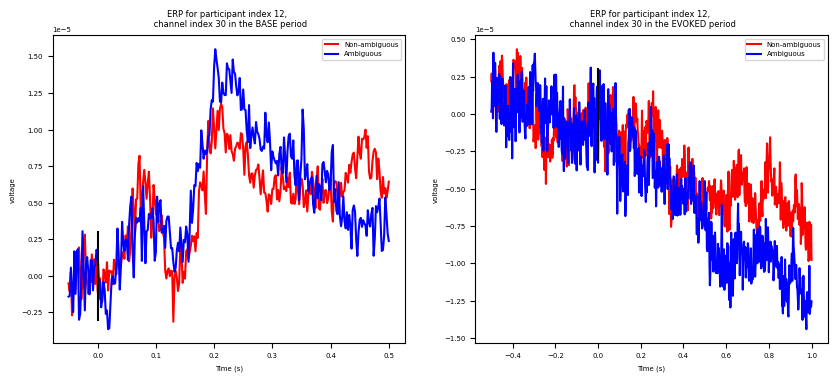

In [6]:
%matplotlib inline

random_part = 12
random_channel = 30

traces_base_NA = data_control_base[random_part, :, random_channel, :]
traces_base_AM = data_experimental_base[random_part, :, random_channel, :]
traces_evoked_NA = data_control[random_part, :, random_channel, :]
traces_evoked_AM = data_experimental[random_part, :, random_channel, :]

print(traces_base_NA.shape)
ERP_base_NA = np.mean(traces_base_NA, axis = 0)
ERP_base_AM = np.mean(traces_base_AM, axis = 0)
ERP_evoked_NA = np.mean(traces_evoked_NA, axis = 0)
ERP_evoked_AM = np.mean(traces_evoked_AM, axis = 0)
print(ERP_base_NA.shape)

fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2) # 1x2 graph

# plot the baseline ERP traces in ax[0]
ax[0].plot(time_base, ERP_base_NA, 'r', label = 'Non-ambiguous')
ax[0].plot(time_base, ERP_base_AM, 'b', label = 'Ambiguous')
ax[0].plot([0,0], np.array([-3,3])*np.float_power(10,-6), 'k')
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("voltage")
ax[0].set(title = "ERP for participant index {}, \n channel index {} in the BASE period".format(random_part, random_channel))
ax[0].legend()

# plot the Evoked ERP traces in ax[1]
ax[1].plot(time_evoked, ERP_evoked_NA, 'r', label = 'Non-ambiguous')
ax[1].plot(time_evoked, ERP_evoked_AM, 'b', label = 'Ambiguous')
ax[1].plot([0,0], np.array([-3,3])*np.float_power(10,-6), 'k')
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("voltage")
ax[1].set(title = "ERP for participant index {}, \n channel index {} in the EVOKED period".format(random_part, random_channel))
ax[1].legend()

plt.show()

## Synthesizing Group-Level Averages on Event-Related Potentials (ERP)

Having examined the ERP for both the Non-Ambiguous and Ambiguous conditions in a single participant for a solitary trial, one can now broaden this analysis to encompass group-level findings. Within this perspective, one could view each participant's set of trials as a single observation, thus rendering each participant as one observation within the group-level analysis. What we want to discover is: *Are there consistent ERP differences between the Non-Ambiguous and Ambiguous conditions that recur across participants and therefore are noticeable in a group-level analysis?*  

To perform this analysis:

1) First allocate empty arrays using np.zeros, carefully ensuring that it possesses the desired shape to accommodate one ERP for a selected channel per participant. 
2) Loop through participants, to calculate the ERPs  
3) For each group_ERP matrix, compute the mean ERP by taking the mean across the participant dimension.
4) For each group_ERP matrix, calculate the ERP standard deviation (SD) by determining the standard deviation across the participant dimension. 

(14, 276)


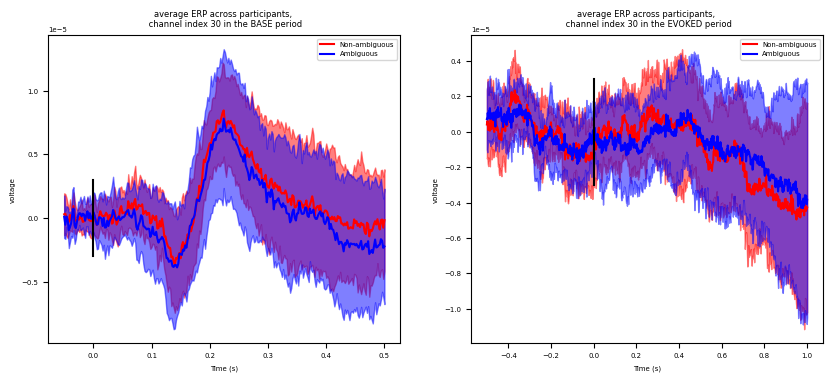

In [7]:
random_channel = 30 # Select a random channel

# 1) Setup group_ERP datastructures with zeros
group_ERP_baseline_NA = np.zeros((nParticipants, nSamples_base))
group_ERP_baseline_AM = np.zeros((nParticipants, nSamples_base))
group_ERP_evoked_NA = np.zeros((nParticipants, nSamples))
group_ERP_evoked_AM = np.zeros((nParticipants, nSamples))

# 2) Loop across participants - fill up the datastructures
for iPart in range(nParticipants):
    # Fill the group_ERP datastructures with the mean ERPs across all 44 trials 
    curr_part_traces_base_NA = data_control_base[iPart, :, random_channel, :]
    curr_part_ERP_base_NA = np.mean(curr_part_traces_base_NA, axis = 0) # across the trials
    group_ERP_baseline_NA[iPart,:] = curr_part_ERP_base_NA
    
    curr_part_traces_base_AM = data_experimental_base[iPart, :, random_channel, :]
    curr_part_ERP_base_AM = np.mean(curr_part_traces_base_AM, axis = 0)
    group_ERP_baseline_AM[iPart,:] = curr_part_ERP_base_AM
    
    curr_part_traces_evoked_NA = data_control[iPart, :, random_channel, :]
    curr_part_ERP_evoked_NA = np.mean(curr_part_traces_evoked_NA, axis = 0)
    group_ERP_evoked_NA[iPart,:] = curr_part_ERP_evoked_NA
    
    curr_part_traces_evoked_AM = data_experimental[iPart, :, random_channel, :]
    curr_part_ERP_evoked_AM = np.mean(curr_part_traces_evoked_AM, axis = 0)
    group_ERP_evoked_AM[iPart,:] = curr_part_ERP_evoked_AM
    
print(group_ERP_baseline_NA.shape) # print the shape of an example

# 3) Calculate group_ERP means across the participant dimension
mean_ERP_base_NA = np.mean(group_ERP_baseline_NA, axis = 0)
mean_ERP_base_AM = np.mean(group_ERP_baseline_AM, axis = 0)
mean_ERP_evoked_NA = np.mean(group_ERP_evoked_NA, axis = 0)
mean_ERP_evoked_AM = np.mean(group_ERP_evoked_AM, axis = 0)

# 4) Calculate group_ERP SD's across the participant dimension
std_ERP_base_NA = np.std(group_ERP_baseline_NA, axis = 0)
std_ERP_base_AM = np.std(group_ERP_baseline_AM, axis = 0)
std_ERP_evoked_NA = np.std(group_ERP_evoked_NA, axis = 0)
std_ERP_evoked_AM = np.std(group_ERP_evoked_AM, axis = 0)

fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2) # 1x2 graph

# Plot the baseline av ERP traces + STD in ax[0]
ax[0].plot(time_base, mean_ERP_base_NA, 'r', label = 'Non-ambiguous')
ax[0].fill_between(time_base, mean_ERP_base_NA+std_ERP_base_NA,mean_ERP_base_NA-std_ERP_base_NA, alpha = 0.5, color = 'r')

ax[0].plot(time_base, mean_ERP_base_AM, 'b', label = 'Ambiguous')
ax[0].fill_between(time_base, mean_ERP_base_AM+std_ERP_base_AM,mean_ERP_base_AM-std_ERP_base_AM, alpha = 0.5, color = 'b')

ax[0].plot([0,0], np.array([-3,3])*np.float_power(10,-6), 'k')
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("voltage")
ax[0].set(title = "average ERP across participants, \n channel index {} in the BASE period".format(random_channel))
ax[0].legend()

# Plot the Evoked av ERP traces + STD in ax[1]
ax[1].plot(time_evoked, mean_ERP_evoked_NA, 'r', label = 'Non-ambiguous')
ax[1].fill_between(time_evoked, mean_ERP_evoked_NA+std_ERP_evoked_NA, mean_ERP_evoked_NA-std_ERP_evoked_NA, alpha = 0.5, color = 'r')

ax[1].plot(time_evoked, mean_ERP_evoked_AM, 'b', label = 'Ambiguous')
ax[1].fill_between(time_evoked, mean_ERP_evoked_AM+std_ERP_evoked_AM, mean_ERP_evoked_AM-std_ERP_evoked_AM, alpha = 0.5, color = 'b')

ax[1].plot([0,0], np.array([-3,3])*np.float_power(10,-6), 'k')
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("voltage")
ax[1].set(title = "average ERP across participants, \n channel index {} in the EVOKED period".format(random_channel))
ax[1].legend()

plt.show()


## Preparing Data Structure for Time-Frequency Analysis
To pre-allocate the TFR matrix for a temporally resolved frequency examination (across each trial, channel, participant, and respective analysis window), it's essential to first determine the amount of analysis windows required. This calculation relies on:
- window's length
- overlap degree
- the sample volume in each EEG trace 

In addition, we should figure out the quantity of Fourier coefficients needed to store for each analysis window.

Given that this analysis is centred around gamma frequencies, a frequency resolution of 5Hz is used.

In [8]:
srate = 500 # sampling freq = 500 Hz.

# Define the sampling rate 
sample_step = 1/srate # time between adjacent samples  
# Define the Nyquist frequency 
nyquist_freq = srate/2 # Maximum frequency that can be accurately represented in a digitized signal

freq_res = 5 # frequency resolution is 5 for gamma

# Define sample count required to achieve the desired frequency resolution
N_samples_FFT = int(srate/freq_res)
print("the number of samples needed to reach this frequency resolution is:", N_samples_FFT)

# Define the index of frequencies that will be examined with the chosen frequency resolution
spect_freqs = fft.rfftfreq(int(N_samples_FFT), 1 / srate)
print("the first five frequencies we can analyse with this resolution are:", spect_freqs[:5])

# Define the frequency count (in spect_freqs) that will be examined
nFreq = len(spect_freqs)
print("the number of frequencies we can analyse with this resolution is:", nFreq)

# Define base_start as the sample index for time = 0s in the time_base axis.
base_start = np.argmin(np.abs(time_base))
print("the analysis window for the baseline window starts at sample:", base_start)

# Define window_control_base as the 4D array subset of data_control_base that holds the right samples
window_control_base = data_control_base[:,:,:, base_start:base_start + N_samples_FFT]
print("window_control_base has shape:", window_control_base.shape)

# similarly for window_experimental_base
window_experimental_base = data_experimental_base[:,:,:, base_start:base_start + N_samples_FFT]
print("window_experimental_base has shape:", window_experimental_base.shape)

the number of samples needed to reach this frequency resolution is: 100
the first five frequencies we can analyse with this resolution are: [ 0.  5. 10. 15. 20.]
the number of frequencies we can analyse with this resolution is: 51
the analysis window for the baseline window starts at sample: 25
window_control_base has shape: (14, 44, 59, 100)
window_experimental_base has shape: (14, 44, 59, 100)


## Setting up the Time-Frequency Representation (TFR) 5D Array
With the dimensions of our baseline spectrum analysis window already defined, we can now establish the time-step between consecutive analysis windows to thoroughly cover the Evoked period. Keep in mind that one of the objectives is to create overlapping adjacent analysis windows. Thus, the advancement along the time axis is always a fraction of the analysis window's length (establishing overlap). The initial analysis window begins at time index -0.5 (the first sample in the evoked period). The concluding window commences at a point on the time axis such that it remains within the Evoked window (i.e., the final sample of the last window should occur at or before 1.0s).

In the code below, the following steps were taken:
- I assigned `window_step` a value that is 10% of the analysis window's length, ensuring adequate overlap between consecutive analysis windows. If window A originates at sample `X`, the subsequent window B initiates at sample `X`+`window_step`.
- I generated a vector named `window_starts`, which consists of the starting sample for each analysis window.
- Created `nWindows`, which represents the total number of analysis windows that can be accommodated along the time axis, given the time-step between successive windows.

The zeros-filled TFR matrix with 5 dimensions will be pre-allocated and stored in the variables `TFR_5D_ctr` and `TFR_5D_exp`. This array is designed to accommodate the Fourier Spectrum for each analyzed window.

In [9]:
# Set window_step to 10% of the length of the analysis window
window_step = N_samples_FFT / 10 
print("the window step size for this frequency resolution is: ", window_step)

window_starts = np.arange(start= 0, stop = (nSamples - N_samples_FFT), step = window_step, dtype = "int")

# Define nWindows as the number of analysis windows
nWindows = len(window_starts)
print("the number of analysis windows for this frequency resolution is: ", nWindows)

# check 
print("The 11th window start at sample {} which is {} samples further than the first window start (at sample {})".format(window_starts[10],window_starts[10]-window_starts[0],window_starts[0]))
print("this corresponds exactly to the window size of:", N_samples_FFT)

# Define TFR_5D_ctr with np.zeros 
# 5 dimensions: nParticipants x nTrials x nChans x nWindows x nFreq 
TFR_5D_ctr = np.zeros((nParticipants, nTrials, nChans, nWindows, nFreq))+np.nan # Fill all positions with NaN.
print("the shape of TFR_5D_ctr is: ", TFR_5D_ctr.shape)

# Define TFR_5D_exp with np.zeros and add NaN
# 5 dimensions: nParticipants x nTrials x nChans x nWindows x nFreq 
TFR_5D_exp = np.zeros((nParticipants, nTrials, nChans, nWindows, nFreq))+np.nan # Fill all positions with NaN.
print("the shape of TFR_5D_exp is: ", TFR_5D_ctr.shape)

the window step size for this frequency resolution is:  10.0
the number of analysis windows for this frequency resolution is:  66
The 11th window start at sample 100 which is 100 samples further than the first window start (at sample 0)
this corresponds exactly to the window size of: 100
the shape of TFR_5D_ctr is:  (14, 44, 59, 66, 51)
the shape of TFR_5D_exp is:  (14, 44, 59, 66, 51)


## Executing Time-Resolved Frequency Analysis

After having pre-allocated all the TFR_5D, the next step involves populating these 5D TFR arrays with power values derived from Fourier Spectrum. Each element in this 5D matrix will correspond to a specific value from the Fourier Spectrum. This step is exclusively for the EVOKED arrays; analysis of baseline arrays which only contain one "window" will be carried out later.

In [10]:
# Iterate over: nParticipants, nTrials, and nChans.
# Inside this loop, extract the present EEG trace 
# Save curr_signal_ctr from TFR_5D_ctr and curr_signal_exp from TFR_5D_exp as variables.

for iParts in np.arange(nParticipants):
    print('processing Participant number ', iParts+1)
    for iTrial in np.arange(nTrials):
        #print('processing Trial number ', iTrial+1)
        for iChan in np.arange(nChans):
            # first, control
            curr_signal_ctr = data_control[iParts, iTrial, iChan, :]
            #print("The current signal has a length of {} samples".format(len(curr_signal_ctr)))
            if any(curr_signal_ctr!=0):
                for iWindow in np.arange(nWindows):
                    # we can specificy our window starting point as a function of iWindow
                    curr_start = int(window_starts[iWindow])

                    # then we add our analysis window
                    curr_stop = int(curr_start + N_samples_FFT)

                    #print("curr_start: ", curr_start, "curr_stop: ", curr_stop)
                    curr_window_control = curr_signal_ctr[curr_start:curr_stop]
                    if sum(curr_window_control) == 0:
                        print("Control segment error: all zeros: iPart=",iParts," iTrial:",iTrial," iChan:", iChan," iWindow:",iWindow)
                    if len(curr_window_control) !=  N_samples_FFT:
                        print("len(curr_window_control) !=  N_samples_FFT")
                    spectrum_slice_control = fft.rfft(curr_window_control)
                    ps_slice_control = np.abs(spectrum_slice_control) / N_samples_FFT *2
                    TFR_5D_ctr[iParts, iTrial, iChan, iWindow, :] = ps_slice_control
                
            else:
                print("Control: skipping entire trial iPart=",iParts," iTrial:",iTrial," iChan:", iChan)
            # second, experimental
            curr_signal_exp = data_experimental[iParts, iTrial, iChan, :]
            
            if any(curr_signal_exp!=0):
                for iWindow in np.arange(nWindows):
                    # we can specificy our window starting point as a function of iWindow
                    curr_start = int(window_starts[iWindow])

                    # then we add our analysis window
                    curr_stop = int(curr_start + N_samples_FFT)

                    #print("curr_start: ", curr_start, "curr_stop: ", curr_stop)
                    curr_window_exp = curr_signal_exp[curr_start:curr_stop]
                    if sum(curr_window_exp) == 0:
                        print("Exp error: all zeros: iPart=",iParts," iTrial:",iTrial," iChan:", iChan," iWindow:",iWindow)
                    if len(curr_window_exp) !=  N_samples_FFT:
                        print("len(curr_window_exp) != N_samples_FFT")
                    spectrum_slice_exp = fft.rfft(curr_window_exp)
                    ps_slice_exp = np.abs(spectrum_slice_exp) / N_samples_FFT *2
                    TFR_5D_exp[iParts, iTrial, iChan, iWindow, :] = ps_slice_exp
            else:
                print("Exp: skipping entire trial iPart=",iParts," iTrial:",iTrial," iChan:", iChan)
            

processing Participant number  1
processing Participant number  2
processing Participant number  3
processing Participant number  4
processing Participant number  5
processing Participant number  6
processing Participant number  7
processing Participant number  8
processing Participant number  9
processing Participant number  10
processing Participant number  11
processing Participant number  12
processing Participant number  13
processing Participant number  14


In [11]:
# a vectorised version that applies the fft to 4D window slices
TFR_5D_ctr2 = np.zeros((nParticipants, nTrials, nChans, nWindows, nFreq))+np.nan
for iWindow in np.arange(nWindows):
    curr_start = int(window_starts[iWindow])

    # then we add our analysis window
    curr_stop = int(curr_start + N_samples_FFT)
    curr_window_control = data_control[:, :, :, curr_start:curr_stop]
    spectrum_slice_control = fft.rfft(curr_window_control)
    ps_slice_control = np.abs(spectrum_slice_control) / N_samples_FFT *2
    TFR_5D_ctr2[:, :, :, iWindow, :] = ps_slice_control

## Computing Power Spectra for Baseline Window

The objective now is to calculate the power spectra for the baseline window. This process should result in a 4D-matrix, similar in structure to the 5D TFR arrays, excluding the windows dimension. Why? Well, presently, both the `window_control_base` and `window_experimental_base` arrays maintain a 4D structure, as they hold a sample vector of length `N_samples_FFT` for each participant, trial, and channel. In the following step, we can apply the fast Fourier transform to this 4D matrix, but instead of generating a 5D TFR matrix, it results in a 4D one, given that we're only utilizing a single window (hence, eliminating the `nWindows` dimension).

In [12]:
# define TFR_ctr_base and add NaN
# nParticipants x nTrials x nChans x nFreq 
TFR_ctr_base = np.zeros((nParticipants, nTrials, nChans, nFreq))+np.nan
print("the shape of TFR_ctr_base is: ", TFR_ctr_base.shape)

# define TFR_exp_base and add NaN
# nParticipants x nTrials x nChans x nFreq 
TFR_exp_base = np.zeros((nParticipants, nTrials, nChans, nFreq))+np.nan
print("the shape of TFR_exp_base is: ", TFR_exp_base.shape)

# check if the shapes match:
evoked_shape_ctr = np.asarray(TFR_5D_ctr.shape)
evoked_shape_exp = np.asarray(TFR_5D_exp.shape)
base_shape_ctr = np.asarray(TFR_ctr_base.shape)
base_shape_exp = np.asarray(TFR_exp_base.shape)
print(evoked_shape_ctr[[0,1,2,4]] == base_shape_ctr)
print(evoked_shape_exp[[0,1,2,4]] == base_shape_exp)

the shape of TFR_ctr_base is:  (14, 44, 59, 51)
the shape of TFR_exp_base is:  (14, 44, 59, 51)
[ True  True  True  True]
[ True  True  True  True]


In [13]:
# run the TFR loop over the baseline data

for iParts in np.arange(nParticipants):
    print('processing Participant number ', iParts+1)
    for iTrial in np.arange(nTrials):
        #print('processing Trial number ', iTrial+1)
        for iChan in np.arange(nChans):
            # first, control
            curr_signal_ctr = window_control_base[iParts, iTrial, iChan, :]
            #print("The current signal has a length of {} samples".format(len(curr_signal_ctr)))
            if any(curr_signal_ctr!=0):
                spectrum_slice_control = fft.rfft(curr_signal_ctr)
                ps_slice_control = np.abs(spectrum_slice_control) / N_samples_FFT *2
                TFR_ctr_base[iParts, iTrial, iChan, :] = ps_slice_control

            else:
                print("Control: skipping entire trial iPart=",iParts," iTrial:",iTrial," iChan:", iChan)
            # second, experimental
            curr_signal_exp = window_experimental_base[iParts, iTrial, iChan, :]
            #print("The current signal has a length of {} samples".format(len(curr_signal_ctr)))
            if any(curr_signal_exp!=0):
                spectrum_slice_exp = fft.rfft(curr_signal_exp)
                ps_slice_exp = np.abs(spectrum_slice_exp) / N_samples_FFT *2
                TFR_exp_base[iParts, iTrial, iChan, :] = ps_slice_exp
            else:
                print("Exp: skipping entire trial iPart=",iParts," iTrial:",iTrial," iChan:", iChan)
        

processing Participant number  1
processing Participant number  2
processing Participant number  3
processing Participant number  4
processing Participant number  5
processing Participant number  6
processing Participant number  7
processing Participant number  8
processing Participant number  9
processing Participant number  10
processing Participant number  11
processing Participant number  12
processing Participant number  13
processing Participant number  14


## Plot Baseline Powerspectrum for 1 participant and 1 channel

First I plot the Baseline Powerspectrum for only one participant and one channel. Afterwards, this can be extended to chart the powerspectrum across all trials. 

The visualization consists of four subplots. In the left column, are the plots for the baseline power spectrum for each trial from this participant separately, with the top row showing the Control condition and the bottom row displaying the Experimental condition. On the right side, are the plots of the average baseline power spectrum for a participant of interest (plotted in red), overlayed over the average power spectrum of all participants (in grey).

In [14]:
ch_names = ['Fpz', 'Fp1', 'Fp2', 'AFz', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8','FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'A1', 'A2', 'CPz', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO7']

P4_idx = ch_names.index("P4")

# subset TFR_ctr_base
chan_ps_ctr = TFR_ctr_base[:,:,P4_idx,:] # nPart x nTrials x nFreq 
chan_ps_ctr_rand = chan_ps_ctr[9, :, :]

# subset TFR_exp_base (for the same participant!)
chan_ps_exp = TFR_exp_base[:,:,P4_idx,:] # nPart x nTrials x nFreq 
chan_ps_exp_rand = chan_ps_exp[9, :, :]

print("Shape of Powerspectrum (CTR) for channel P4, participant number 10",chan_ps_ctr_rand.shape )
print("Shape of Powerspectrum (EXP) for channel P4, participant number 10",chan_ps_exp_rand.shape )


Shape of Powerspectrum (CTR) for channel P4, participant number 10 (44, 51)
Shape of Powerspectrum (EXP) for channel P4, participant number 10 (44, 51)


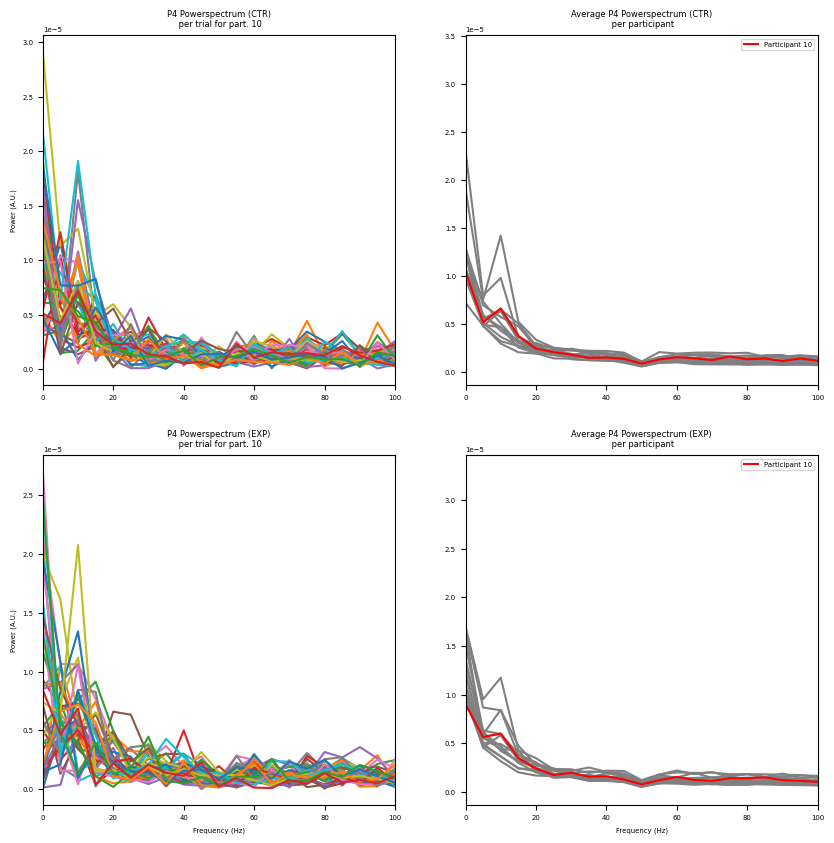

In [15]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10), nrows=2, ncols=2) # 1x2 graph

# Average 51 frequencies, first over 44 trials, and then over 14 participants
chan_ps_ctr_av = np.nanmean(chan_ps_ctr, axis = 1)  # control powerspectra
chan_ps_exp_av = np.nanmean(chan_ps_exp, axis = 1)  # experimental powerspectra

#print(av_per_part.shape)
ax[0,0].plot(spect_freqs,np.transpose(chan_ps_ctr_rand))
ax[0,0].set_xlim(0,100)
ax[0,0].set_ylabel("Power (A.U.)")
#ax[0,0].set_xlabel("Frequency (Hz)")
plt.axes(ax[0,0])
plt.title("P4 Powerspectrum (CTR)\n per trial for part. 10")

ax[1,0].plot(spect_freqs,np.transpose(chan_ps_exp_rand))
ax[1,0].set_xlim(0,100)
ax[1,0].set_ylabel("Power (A.U.)")
ax[1,0].set_xlabel("Frequency (Hz)")
plt.axes(ax[1,0])
plt.title("P4 Powerspectrum (EXP)\n per trial for part. 10")

ax[0,1].plot(spect_freqs,np.transpose(chan_ps_ctr_av), color = "grey")
ax[0,1].plot(spect_freqs,chan_ps_ctr_av[9,:], color = "red", label = "Participant 10")
ax[0,1].set_xlim(0,100)
plt.axes(ax[0,1])
plt.legend()
plt.title("Average P4 Powerspectrum (CTR)\n per participant")

ax[1,1].plot(spect_freqs,np.transpose(chan_ps_exp_av), color = "grey")
ax[1,1].plot(spect_freqs,chan_ps_exp_av[9,:], color = "red", label = "Participant 10")
ax[1,1].set_xlim(0,100)
ax[1,1].set_xlabel("Frequency (Hz)")
plt.axes(ax[1,1])
plt.legend()
plt.title("Average P4 Powerspectrum (EXP)\n per participant")

plt.show()


## Executing baseline normalization
We want to conduct an accurate baseline normalization of the spectral power data. To do this, the spectral power measurements obtained during the baseline period can be used to normalize every individual spectrum contained within our TFR-5D matrices. Essentially, all the spectral power vectors will be divided by a corresponding vector containing baseline power values, resulting in a normalized value. **A value greater than 1 signifies higher power during the evoked period compared to the baseline period, and a value less than 1 signifies lesser power.**

By normalizing each trial on a per-participant, per-channel basis using the aforementioned approach, we can mitigate  inter-individual or inter-channel differences. Here, each trial (channel, participant) serves as its own statistical reference point. 

In [16]:
# Begin by formulating new normalized 5D TFR matrices, 
# normalization only impacts the values, but the shape will be the same as the previous matrices

# Set up empty arrays and fill up with NaNs
TFR_5D_ctr_norm = np.zeros(TFR_5D_ctr.shape)+np.nan
TFR_5D_exp_norm = np.zeros(TFR_5D_exp.shape)+np.nan

# Loop to target the data that requires normalization
for iWindow in np.arange(nWindows):
    print("processing window: ", iWindow)
    print("shape to extract: ", TFR_5D_ctr[:,:,:,iWindow,:].shape)
    print("shape of baseline: ", TFR_ctr_base.shape)
    TFR_5D_ctr_norm[:,:,:,iWindow,:] = TFR_5D_ctr[:,:,:,iWindow,:]/TFR_ctr_base
    TFR_5D_exp_norm[:,:,:,iWindow,:] = TFR_5D_exp[:,:,:,iWindow,:]/TFR_exp_base
    
    
# We should verify the outcome at this point
# As the normalizing factor is constant across all windows from the TFR_5D arrays, 
# the relative differences should remain intact.

# So we want to show equivalence for a random part, trial, chan
# calculate the ratio between the first and last window
# For participant = 1, trial = 2, channel = 3

# Extract the original power spectrum from the first and last window.
# Determine the spectral ratio between the two windows using element-wise division.
ratio_orig = TFR_5D_ctr[5,1,2,0,:] / TFR_5D_ctr[5,1,2,-1,:]
# Extract the normalized power spectrum from the same windows and perform element-wise division.
ratio_norm = TFR_5D_ctr_norm[5,1,2,0,:] / TFR_5D_ctr_norm[5,1,2,-1,:]

# Display both arrays in the console to confirm their equivalence.
pprint(np.reshape([ratio_orig,ratio_norm],(2,-1)).transpose())

processing window:  0
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)


/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/3988940396.py:13: RuntimeWarning: divide by zero encountered in divide
  TFR_5D_ctr_norm[:,:,:,iWindow,:] = TFR_5D_ctr[:,:,:,iWindow,:]/TFR_ctr_base
/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/3988940396.py:13: RuntimeWarning: invalid value encountered in divide
  TFR_5D_ctr_norm[:,:,:,iWindow,:] = TFR_5D_ctr[:,:,:,iWindow,:]/TFR_ctr_base
/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/3988940396.py:14: RuntimeWarning: divide by zero encountered in divide
  TFR_5D_exp_norm[:,:,:,iWindow,:] = TFR_5D_exp[:,:,:,iWindow,:]/TFR_exp_base


processing window:  1
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  2
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  3
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  4
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)


/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/3988940396.py:14: RuntimeWarning: invalid value encountered in divide
  TFR_5D_exp_norm[:,:,:,iWindow,:] = TFR_5D_exp[:,:,:,iWindow,:]/TFR_exp_base


processing window:  5
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  6
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  7
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  8
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  9
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  10
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  11
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  12
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  13
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  14
shape to extract:  (14, 44, 59, 51)
shape of baseline:  (14, 44, 59, 51)
processing window:  15
shape to extract:  (14

## Single Channel TFR Visualization in Time-Domain

After achieving normalized TFR_5D arrays, the next task is to delve deeper and plot the Time-Frequency Representation (TFR) for the chosen channel 'P4'. We initiate by extracting the evolving powerspectrums for the 'P4' channel from the normalized TFRs, specifically for both the experimental and control conditions. This would result in new variables `chan_TFR_norm_ctr` and `chan_TFR_norm_exp`.
As a validation step, we can confirm the dimensions of these new variables, which should be `nParts x nTrials x nWindows x nFreq`.

The entities stored in these arrays are normalized power values corresponding to each time-frequency pair, in comparison to their own baseline. Therefore, the values could be greater than 1 (more power compared to baseline) or less than 1 (less power). For linearity and symmetry, applying a logarithmic (log10) function to the averaged powerspectrum is beneficial.

In [17]:
# Extract channel of interest
chan_idx = ch_names.index("P4")
chan_TFR_norm_ctr = TFR_5D_ctr_norm[:,:,chan_idx,:,:]
chan_TFR_norm_exp = TFR_5D_exp_norm[:,:,chan_idx,:,:]

# Verify that the shape is now nParts x nTrials x nWindows x nFreq
print("the shape of chan_TFR_norm_ctr is: ", chan_TFR_norm_ctr.shape)

# log10 normalisation: Convert the array of power ratios onto a logarithmic scale.
chan_TFR_norm_ctr_log = np.log10(chan_TFR_norm_ctr) 
chan_TFR_norm_exp_log = np.log10(chan_TFR_norm_exp)

# Choose data corresponding to one participant only (participant 2)
# and compute the trial dimension average
chan_TFR_norm_ctr_av = np.nanmean(chan_TFR_norm_ctr_log[0,:,:,:], axis = 0)
chan_TFR_norm_exp_av = np.nanmean(chan_TFR_norm_exp_log[0,:,:,:], axis = 0)

## check the shape: what are the dimension that we have left? Dimensions are (nWindows, nFreq)
print("the shape of chan_TFR_norm_ctr_av is: ",chan_TFR_norm_ctr_av.shape)
print("the shape of chan_TFR_norm_exp_av is: ",chan_TFR_norm_exp_av.shape)

the shape of chan_TFR_norm_ctr is:  (14, 44, 66, 51)
the shape of chan_TFR_norm_ctr_av is:  (66, 51)
the shape of chan_TFR_norm_exp_av is:  (66, 51)


/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/2457791033.py:10: RuntimeWarning: divide by zero encountered in log10
  chan_TFR_norm_ctr_log = np.log10(chan_TFR_norm_ctr)
/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/2457791033.py:11: RuntimeWarning: divide by zero encountered in log10
  chan_TFR_norm_exp_log = np.log10(chan_TFR_norm_exp)


## Visualize the normalized TFRs for the evoked period

check: the first timepoint for the plots is:  -0.5


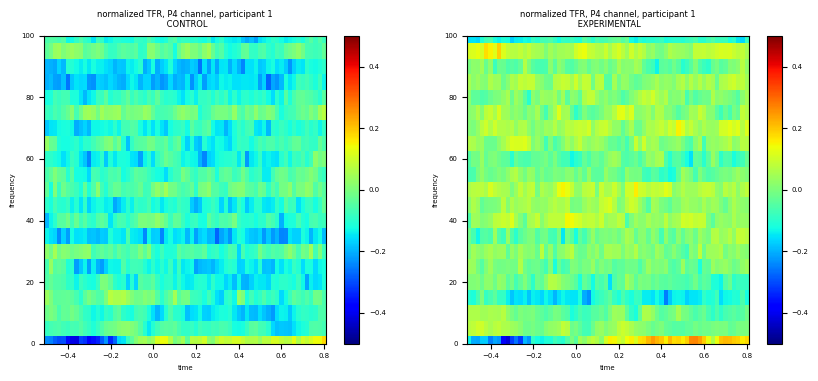

In [18]:
# We build the time axis as a vector that reflects the beginning 
# points of the windows in the evoked time frame in seconds, not samples.

time_evoked_plot = time_evoked[window_starts]  # Derive the start samples of windows

# verify the starting time of the evoked TFR
print("check: the first timepoint for the plots is: ", time_evoked_plot[0])

## set up the plot
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2) # 1x2 graph

# First input to this function is time (x-axis), the second is frequencies (y-axis), and the third is the TFR (z-axis: color scale).

ctrl = ax[0].pcolormesh(time_evoked_plot, spect_freqs, np.transpose(chan_TFR_norm_ctr_av), vmin=-0.5, vmax=0.5, cmap='jet')
exp = ax[1].pcolormesh(time_evoked_plot, spect_freqs, np.transpose(chan_TFR_norm_exp_av), vmin=-0.5, vmax=0.5, cmap='jet')


ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)
ax[0].set_xlabel('time')
ax[1].set_xlabel('time')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('frequency')
plt.axes(ax[0])
plt.title("normalized TFR, P4 channel, participant 1\n CONTROL")
plt.axes(ax[1])
plt.title("normalized TFR, P4 channel, participant 1\n EXPERIMENTAL")

fig.colorbar(ctrl, ax=ax[0])
fig.colorbar(exp, ax=ax[1])
plt.show()

## Consolidating Power Spectrum Variations across Subjects

With the normalised time-frequency response (TFR) matrices for both experimental and control scenarios, it's possible to create a comparative study focusing on the difference between the two conditions. The normalised TFR matrices have standardised scaling across different conditions and participants, indicating power differentials. Hence, they facilitate simple calculations like subtraction and averaging. The purpose of this section is to derive contrast plots that visualize the power deviation between conditions, averaged over participants, to discern any common frequency response patterns. The following code explores the low gamma band, draws out the power contrast in this band, and represents the spectral band values.

In [19]:
# calculate the contrast TFR
TFR_contrast_norm = np.nanmean(TFR_5D_exp_norm - TFR_5D_ctr_norm, axis = 1)

#calculate the average across participants
TFR_contrast_av = np.nanmean(TFR_contrast_norm, axis = 0)

print("The shape of TFR_contrast_av is: ", TFR_contrast_av.shape)


/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/1327943318.py:2: RuntimeWarning: invalid value encountered in subtract
  TFR_contrast_norm = np.nanmean(TFR_5D_exp_norm - TFR_5D_ctr_norm, axis = 1)


The shape of TFR_contrast_av is:  (59, 66, 51)


/opt/homebrew/Caskroom/miniforge/base/envs/env_m1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


/var/folders/p2/fmvj8hvs1l753rcs5yft1q880000gn/T/ipykernel_5898/3003011437.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1) # 1x1 graph


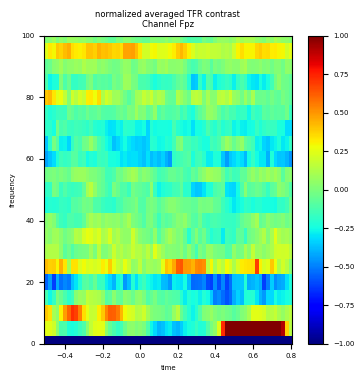

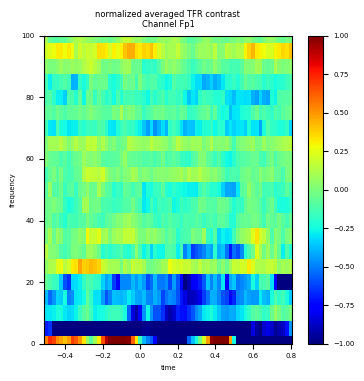

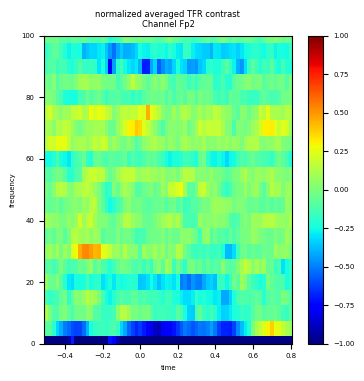

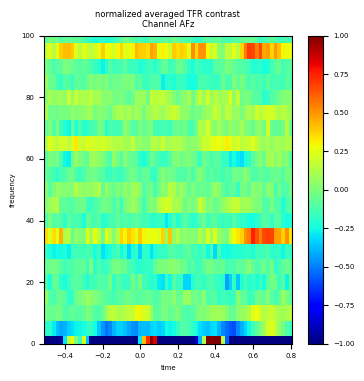

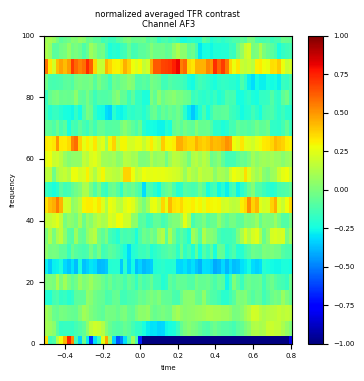

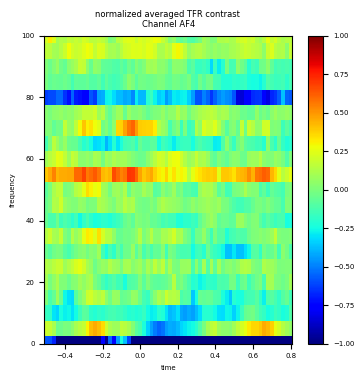

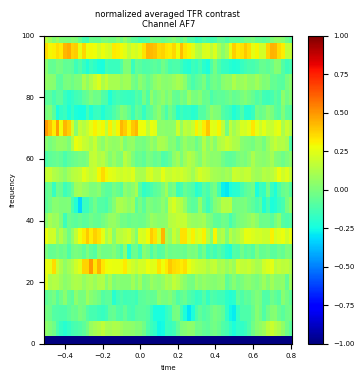

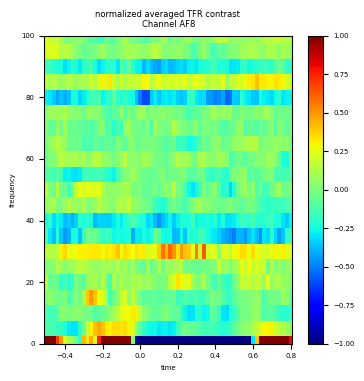

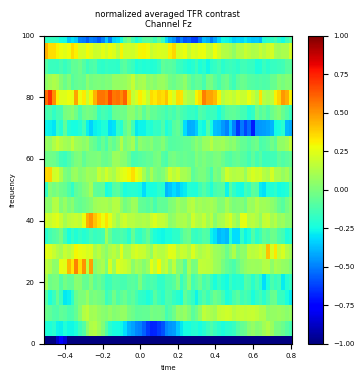

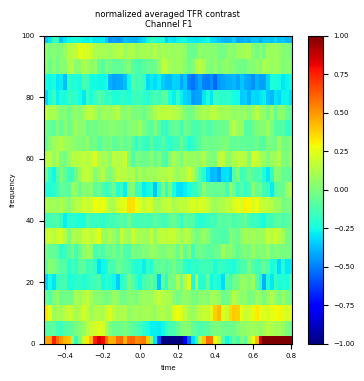

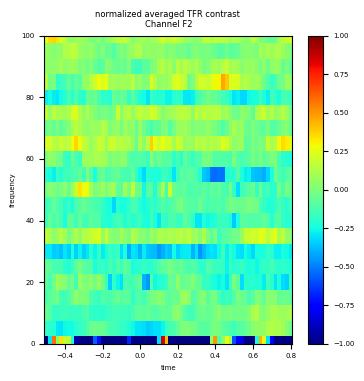

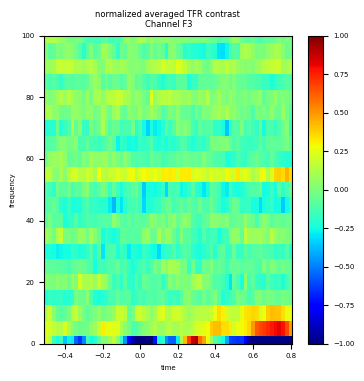

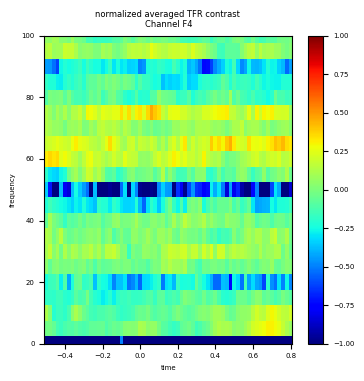

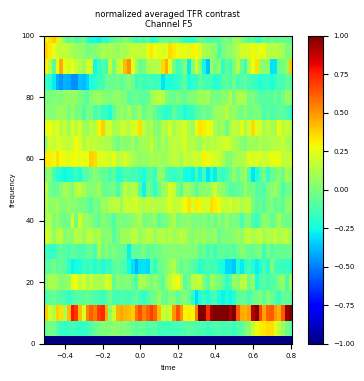

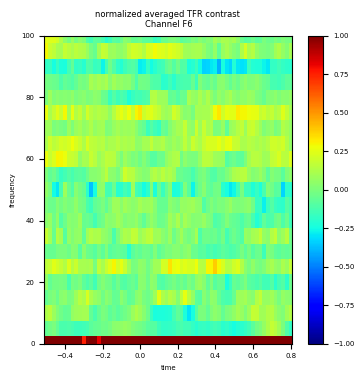

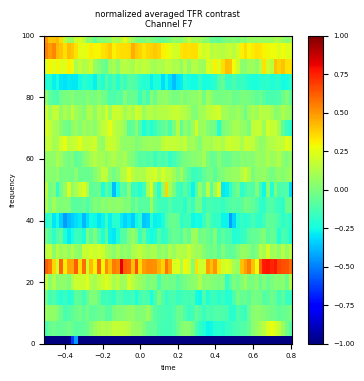

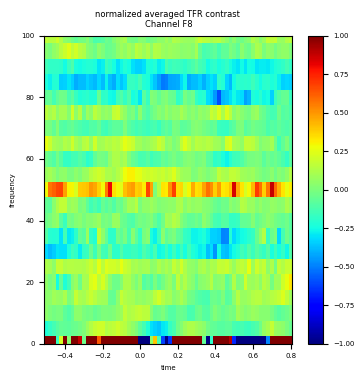

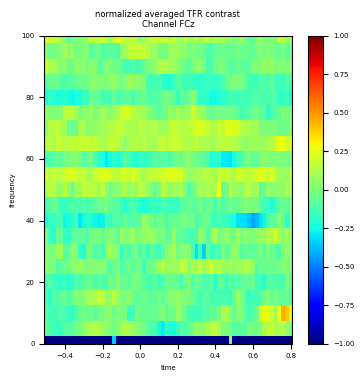

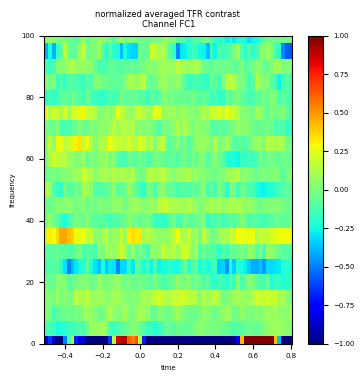

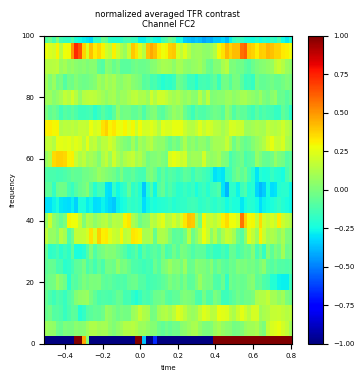

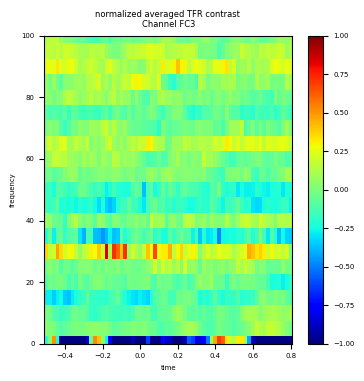

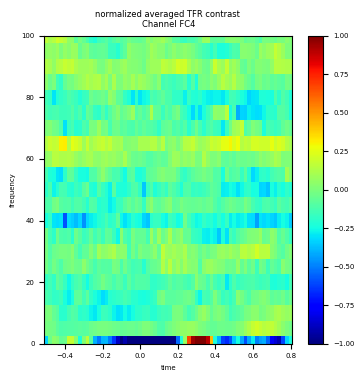

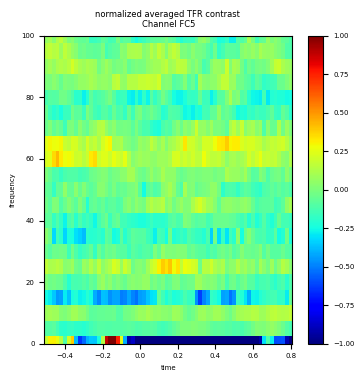

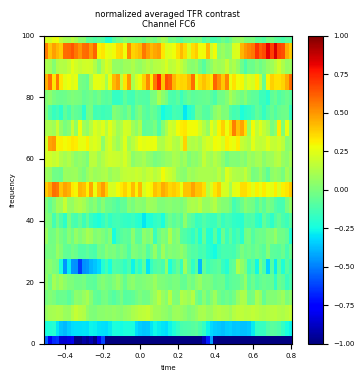

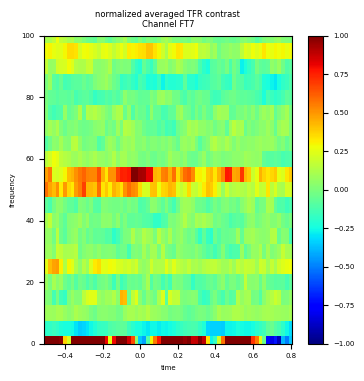

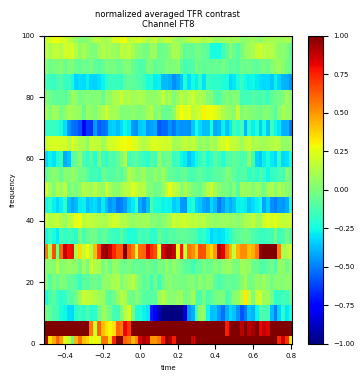

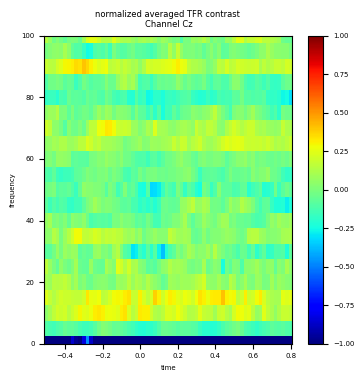

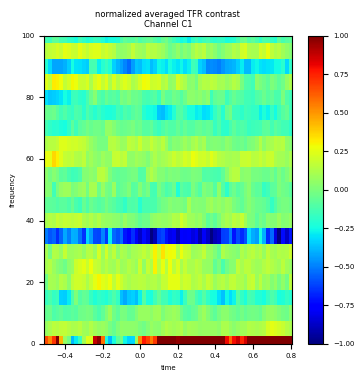

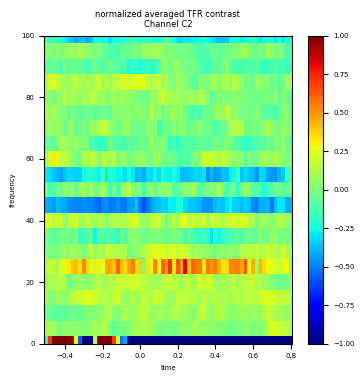

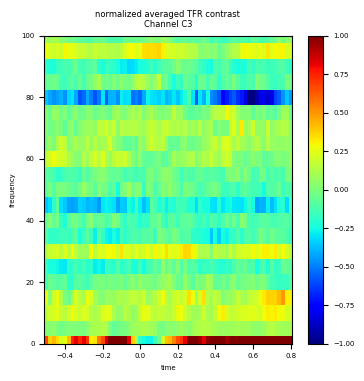

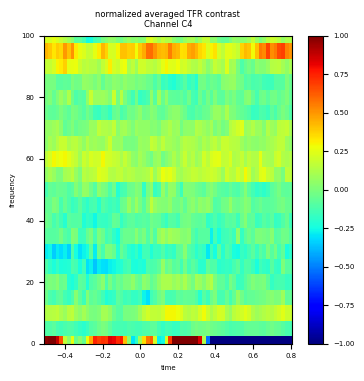

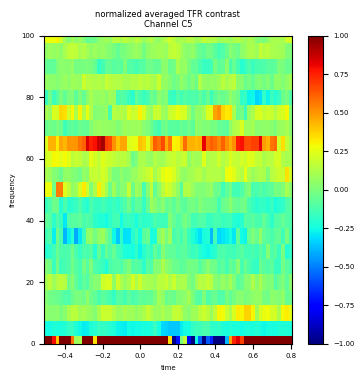

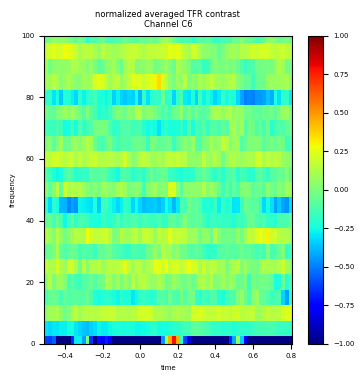

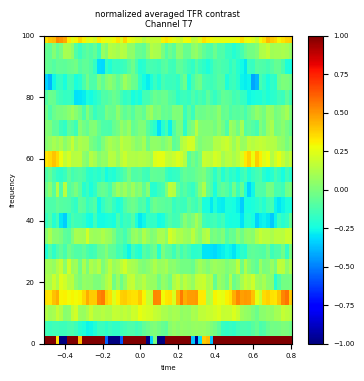

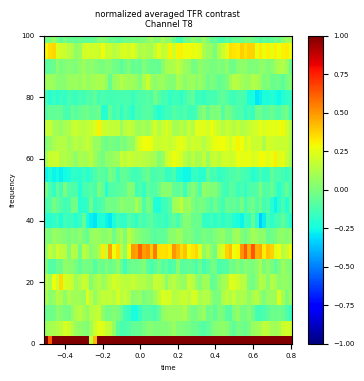

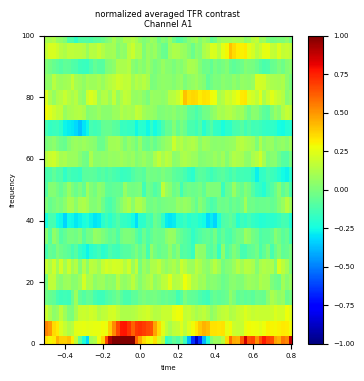

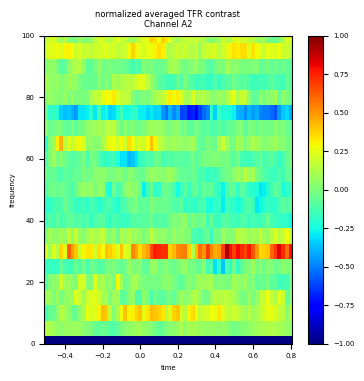

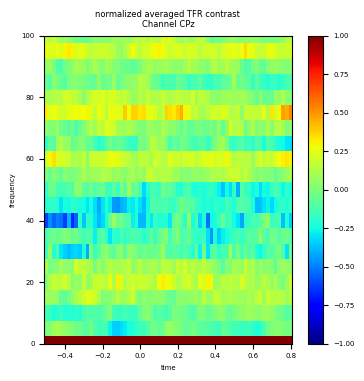

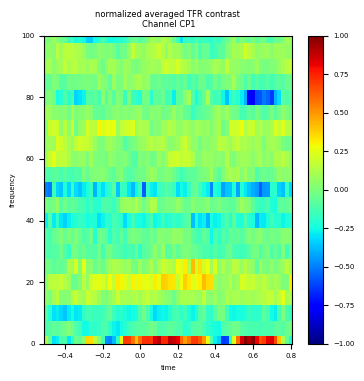

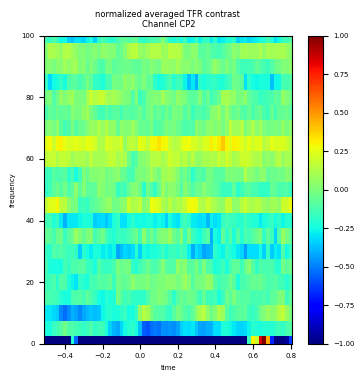

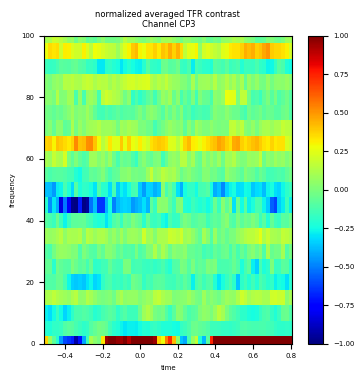

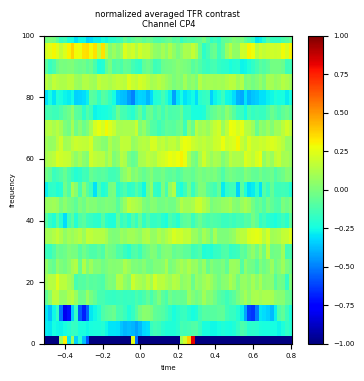

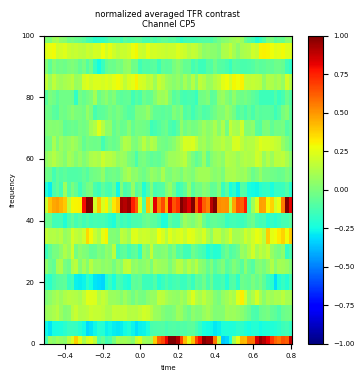

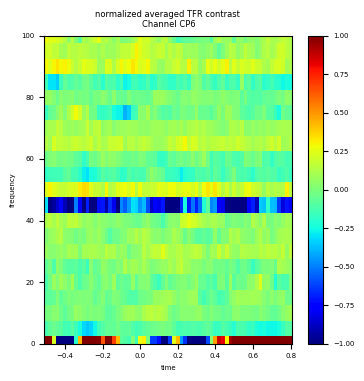

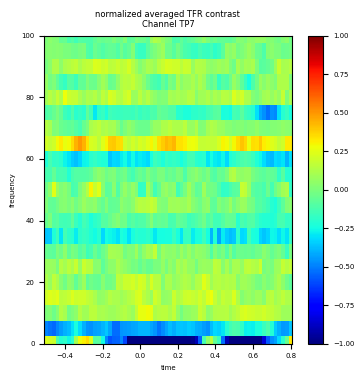

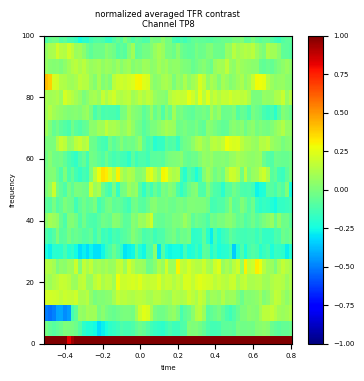

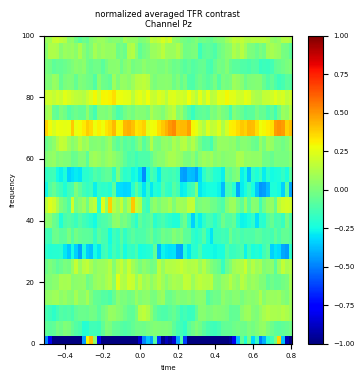

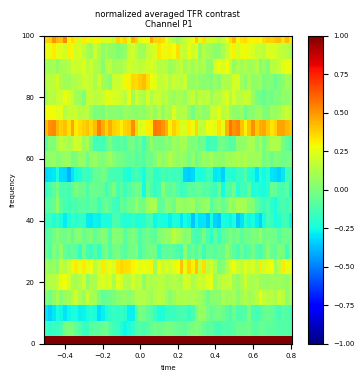

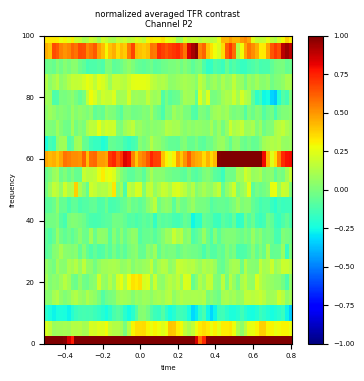

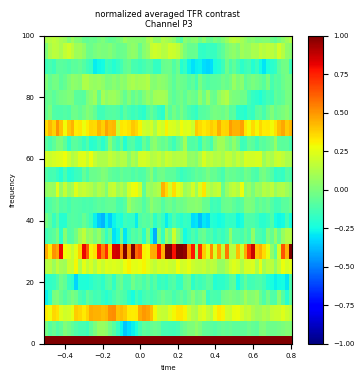

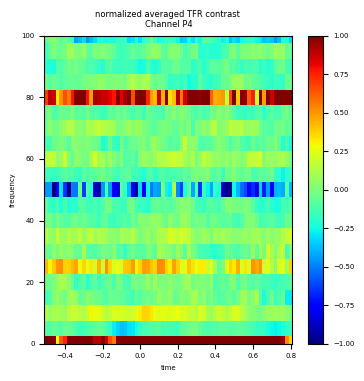

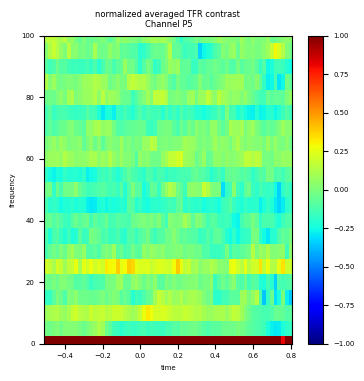

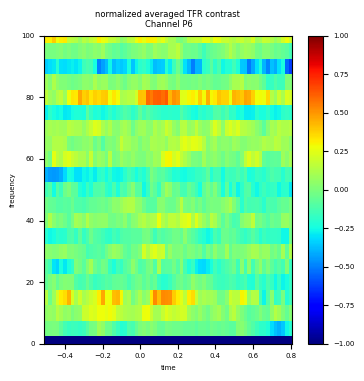

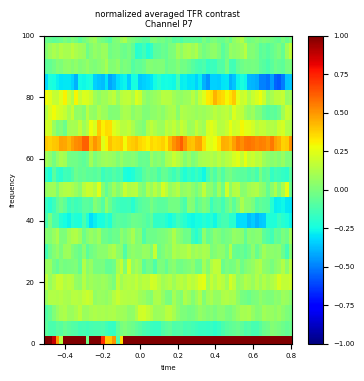

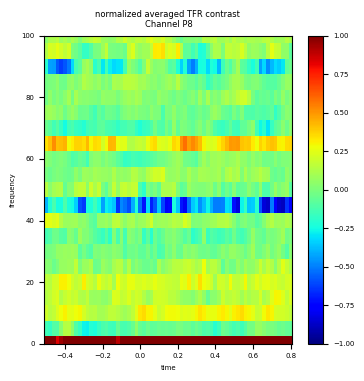

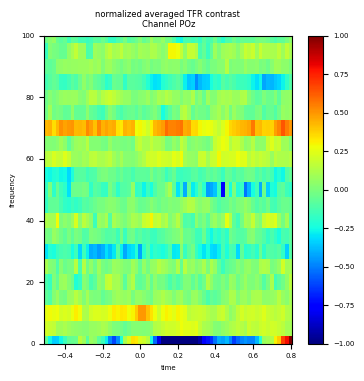

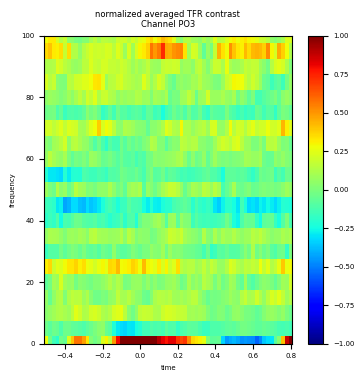

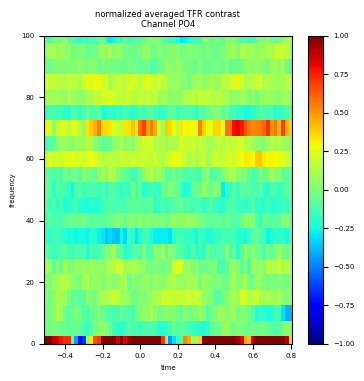

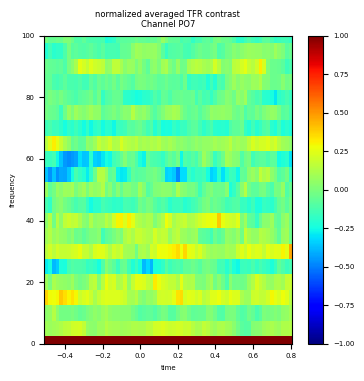

In [20]:
# start a loop across participants
# plot the average contrast per channel in a new figure
# adjust vmin and vmax to reasonable values for visualisation

for iChan in np.arange(nChans):
    fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1) # 1x1 graph
    curr_data = TFR_contrast_av[iChan, :, :]
    vmin = -1
    vmax = 1
    mesh = ax.pcolormesh(time_evoked_plot, spect_freqs, np.transpose(curr_data), vmin=vmin, vmax=vmax, cmap='jet')
    ax.set_ylim(0,100)
    ax.set_xlabel('time')
    ax.set_ylabel('frequency')
    plt.title(f'normalized averaged TFR contrast \nChannel {ch_names[iChan]}')
    
    fig.colorbar(mesh, ax=ax)

[[ 4.31022328e+00  5.08032872e-03 -1.48701190e-01 ...  9.83279572e-02
   1.89569617e-02             nan]
 [ 4.86624889e+00  1.82331226e-02 -1.63856383e-01 ...  6.75839912e-02
   7.35899443e-02             nan]
 [ 3.15075882e+00  7.87484567e-02 -2.28354284e-01 ...  2.06596969e-01
   2.52014084e-02             nan]
 ...
 [ 1.93697219e+01 -2.36236758e-03 -5.27463415e-02 ... -1.25915448e-01
  -8.34743707e-02             nan]
 [ 1.66888165e+01 -1.24596103e-02 -9.22889304e-02 ... -8.42094773e-02
  -7.78661514e-02             nan]
 [ 1.80095370e+01 -4.79294857e-03 -8.41261809e-02 ... -7.31860203e-02
  -6.04865905e-02             nan]]
the size of selected_contrast_subset_av is:  (14,)
[ 0.08037346  0.03100058 -0.1696877   0.16097788 -0.01467685 -0.02222063
  0.0398673   0.30357551 -0.0426303   0.55633685  0.19799814 -0.17541007
 -0.00759105  0.07002105]


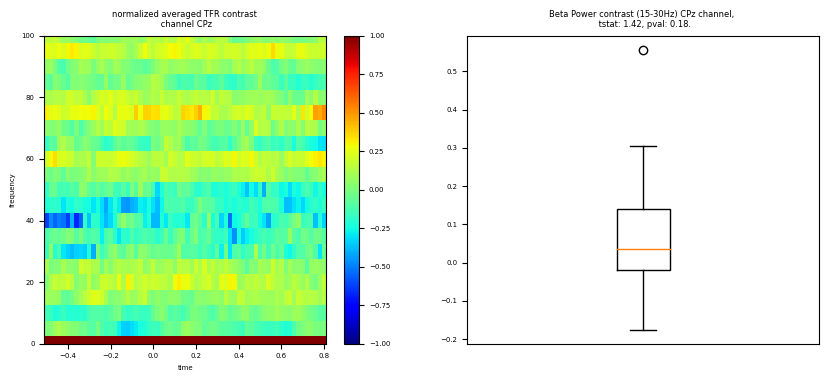

In [21]:
# just the selected channel
chan_name = "CPz"
chan_idx = ch_names.index(chan_name)
selected_contrast = TFR_contrast_norm[:,chan_idx,:,:]
selected_contrast_av = TFR_contrast_av[chan_idx]
print(selected_contrast_av)
# define foi and toi in Hz and sec
foi = [15,30]
toi = [0,0.2]

# define as indexes
foi_index_start = int(np.where(spect_freqs == foi[0])[0])
foi_index_stop = int(np.where(spect_freqs == foi[1])[0])
toi_index_start = int(np.where(np.isclose(time_evoked_plot, toi[0]))[0])
toi_index_stop = int(np.where(np.isclose(time_evoked_plot, toi[1]))[0])

# subset the selected_contrast on foi and toi

selected_contrast_subset = selected_contrast[:,foi_index_start:foi_index_stop,toi_index_start:toi_index_stop]
# take the average across windows and frequencies
selected_contrast_subset_av = np.mean(selected_contrast_subset, axis = 1)
selected_contrast_subset_av = np.mean(selected_contrast_subset_av, axis = 1)
print("the size of selected_contrast_subset_av is: ", selected_contrast_subset_av.shape)

# set to match your plotted data range
vmin = -1
vmax = 1

fig_Q11, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2) # 1x2 graph
mesh = ax[0].pcolormesh(time_evoked_plot, spect_freqs, np.transpose(selected_contrast_av), vmin=vmin, vmax=vmax, cmap='jet')

ax[0].set_ylim(0,100)
ax[0].set_xlabel('time')
ax[0].set_ylabel('frequency')
plt.axes(ax[0])
plt.title("normalized averaged TFR contrast \n channel {}".format(chan_name))

fig_Q11.colorbar(mesh, ax=ax[0])

# to remove any NaNs that might still be in the vector
stats_vector = selected_contrast_subset_av[np.logical_not(np.isnan(selected_contrast_subset_av))]
print(stats_vector)

#optional
import scipy.stats as stats
tstat, pval = stats.ttest_1samp(stats_vector,popmean = 0)

#required
ax[1].boxplot(stats_vector)
ax[1].set_xticks([])
plt.axes(ax[1])
plt.title("Beta Power contrast (15-30Hz) {} channel, \n tstat: {}, pval: {}.".format(chan_name, round(tstat,2), round(pval,2)))

plt.show()

## Visualizing Spectral Power Evolution over Time

In this final section, the various steps performed so far are combined to generate a new set of plots. What we'll end up with is a time series plot that shows the mean spectral power along with its confidence interval. It gives us a snapshot of how average spectral power within a specified band changes during the evoked phase of the trial. 

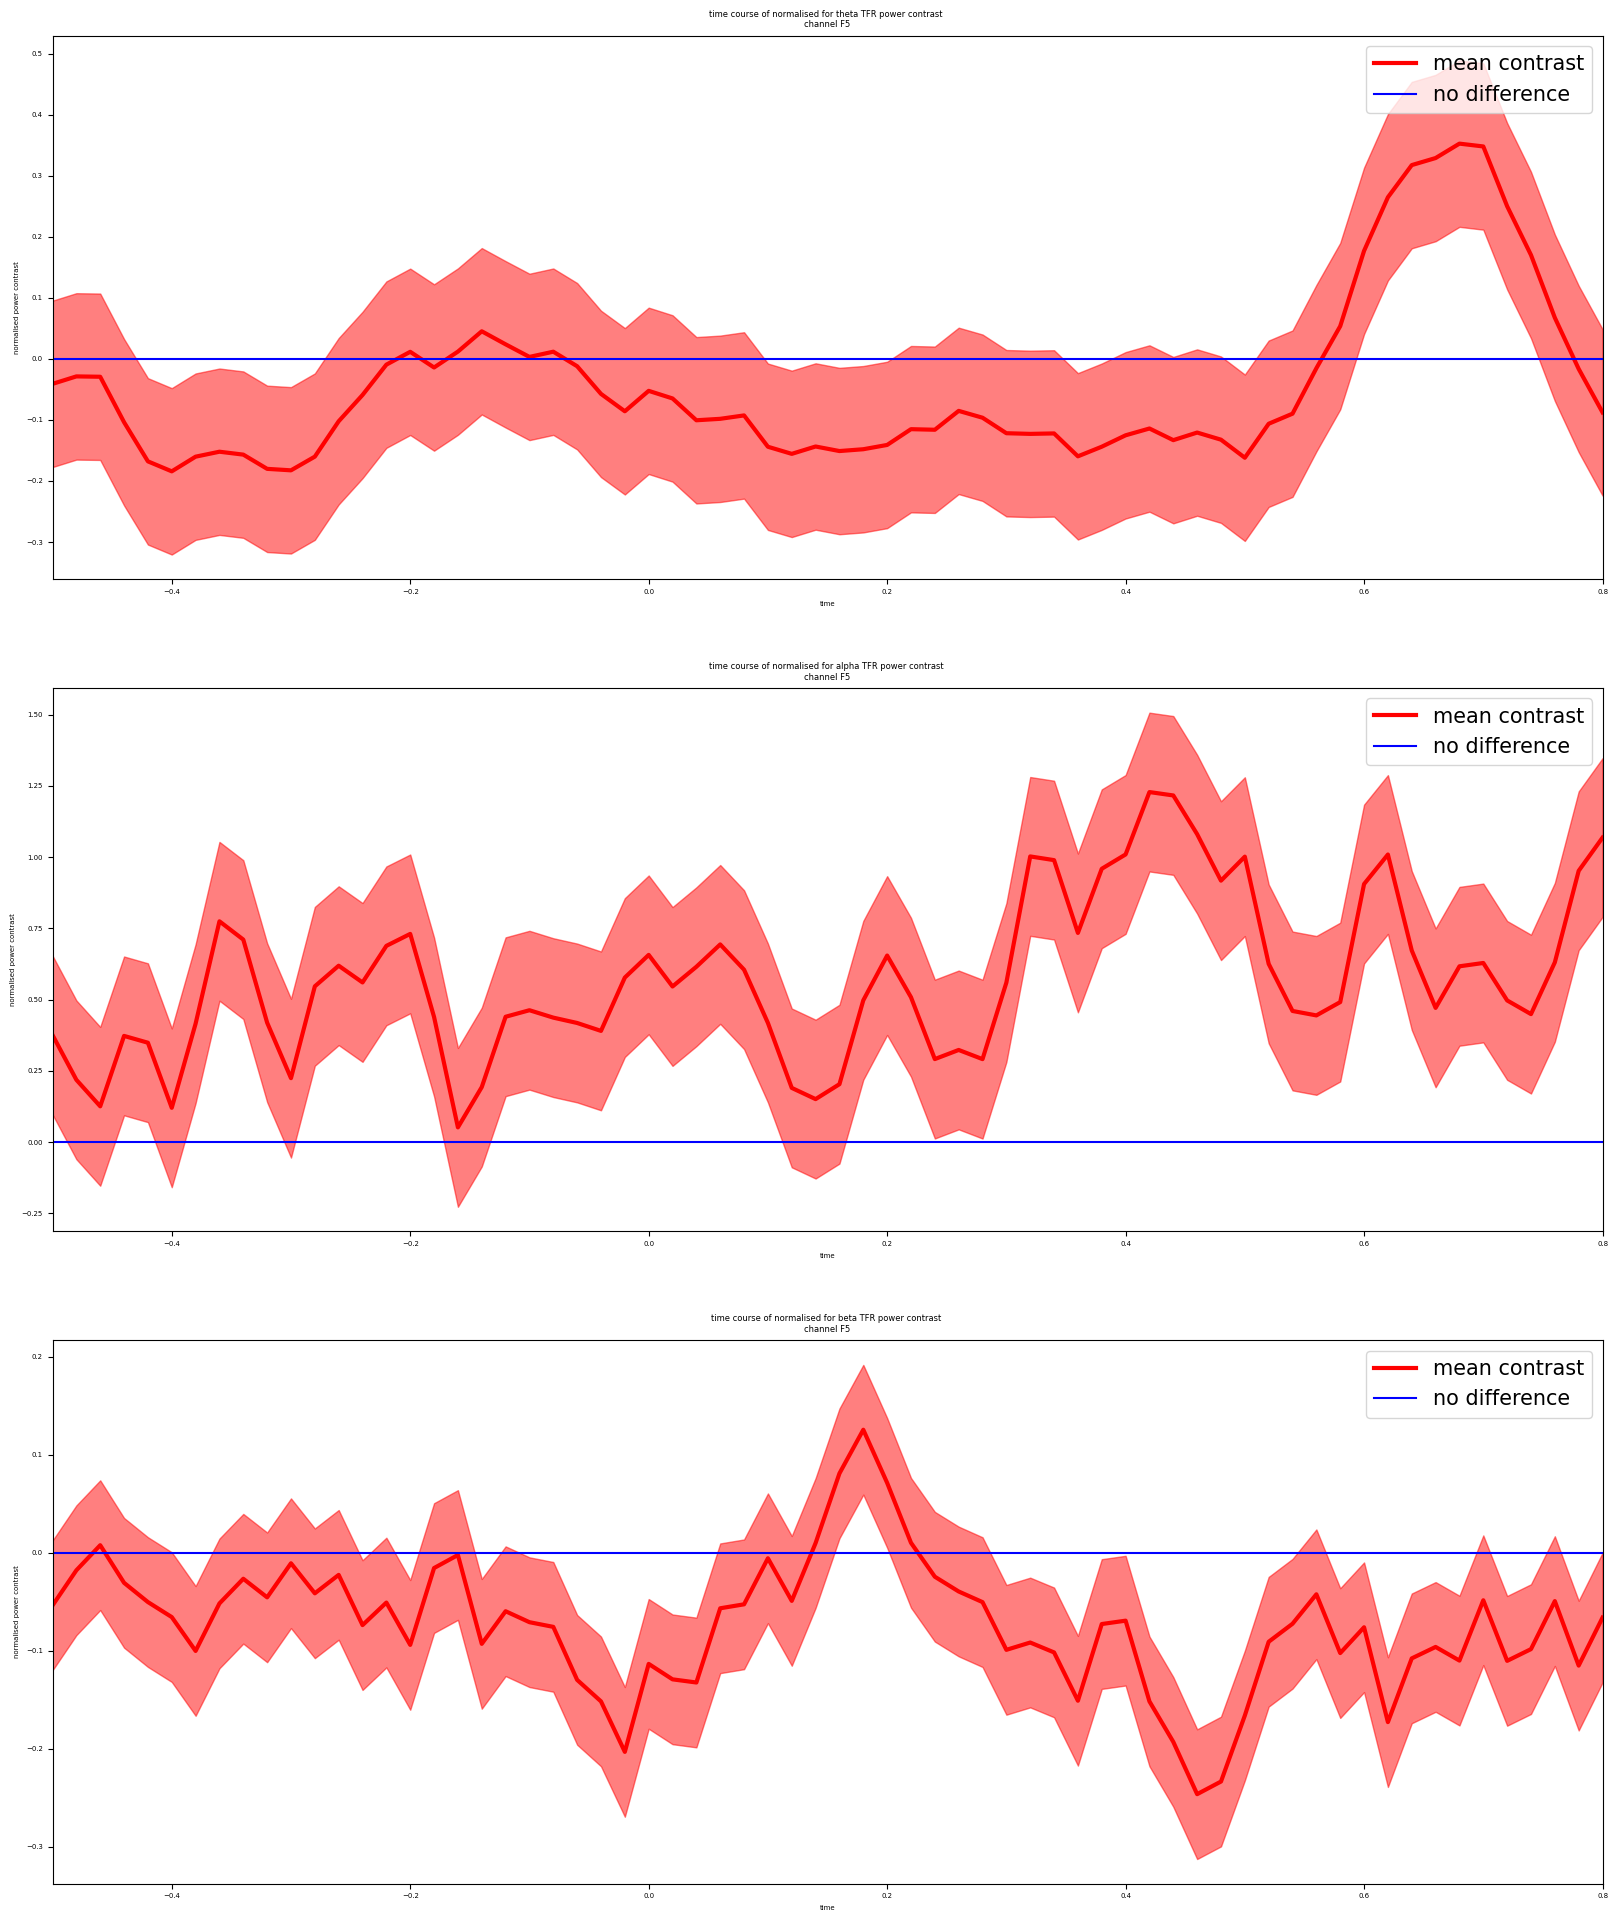

In [22]:
##
ch_name = 'F5'
ch_idx = ch_names.index('F5')
freqs = [[5, 10], [10, 15], [15, 30]]
bands = ['theta', 'alpha', 'beta']
subset = np.nanmean(TFR_contrast_norm[:, ch_idx, :, :], axis = 0)

fig_Q12, ax = plt.subplots(figsize = (20, 24), nrows = 3, ncols = 1)

for index, (freq_range, name) in enumerate(zip(freqs, bands)):
    freq_low = int(np.where(spect_freqs == freq_range[0])[0])
    freq_high = int(np.where(spect_freqs == freq_range[1])[0])
    subset_av = np.nanmean(subset[:, freq_low:freq_high], axis=1)
    std = np.std(subset_av)
    
    ax[index].plot(time_evoked_plot, subset_av, 'r', label = 'mean contrast', linewidth = 3)
    ax[index].fill_between(time_evoked_plot, subset_av + std, subset_av - std, alpha = 0.5, color = 'r')
    ax[index].axhline(y=0, color='b', linestyle='-', label='no difference')
    ax[index].set_xlim(-.5, .8)
    ax[index].set_xlabel('time')
    ax[index].set_ylabel('normalised power contrast')
    ax[index].legend(prop={'size': 15})
    ax[index].set_title(f'time course of normalised for {name} TFR power contrast {chr(10)}channel {ch_name}')

plt.savefig('Figure4.png')
plt.show()
##